In [3]:
import pandas as pd

df = pd.read_excel("C:\\Users\\Harshi\\Downloads\\dataset_google-news-scraper.xlsx")

print(df.head())

                                                guid  \
0  CBMijwFBVV95cUxQN0xQbUlLb3RlQlBrMGRkSzcwcHdwUz...   
1  CBMibkFVX3lxTE90RG9HcXcwYXdWS0tJVS1jLVNfQUNCV3...   
2  CBMi2gFBVV95cUxPLXJwRjUtbHZqWDVieE5WYW1vRU1yVU...   
3  CBMitwFBVV95cUxPSkQ1a2pFRW1pWENNVzVMV3Q0RG1VTl...   
4  CBMinAFBVV95cUxQaGpZdGFoTXJ4U1daYUUwUE4tRVppTl...   

                                               image  \
0  https://storage.googleapis.com/web-content.oan...   
1  https://forklog.com/wp-content/uploads/Neuzhel...   
2  https://cdn.sanity.io/images/s3y3vcno/producti...   
3  https://image.cnbcfm.com/api/v1/image/10812231...   
4  https://dylta6p24nxqg.cloudfront.net/images/17...   

                                                link  \
0  https://www.marketpulse.com/markets/btc-reboun...   
1  https://forklog.com/en/analysts-diverge-on-bit...   
2  https://www.coindesk.com/markets/2025/09/23/no...   
3  https://www.cnbc.com/2025/09/23/bitcoin-could-...   
4  https://www.economies.com/crypto/analysis/e

In [4]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# --- Step 1: Setup and Configuration ---

# IMPORTANT: Replace 'path/to/your/file.xlsx' with the actual path to your original Excel file.
input_file_path = "C:\\Users\\Harshi\\Downloads\\dataset_google-news-scraper.xlsx"

# Define the name for your new output Excel file.
output_file_path = 'updated_excel_file.xlsx'

# Download NLTK stopwords data if necessary.
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# --- Step 2: Load and Process the Data ---

try:
    # Load the original Excel file into a DataFrame.
    df = pd.read_excel("C:\\Users\\Harshi\\Downloads\\dataset_google-news-scraper.xlsx")

    # Perform all the preprocessing steps from before.
    # 1. Remove Blank rows and ensure the 'title' column is string type.
    df.dropna(subset=['title'], inplace=True)
    df['title'] = df['title'].astype(str)
    df = df[df['title'].str.strip() != '']

    # 3. Make every text in the text column lowercase.
    df['lowercase_title'] = df['title'].str.lower()

    # 4. Remove special characters.
    df['no_special_chars_title'] = df['lowercase_title'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

    # 2. Tokenize the cleaned text by splitting on spaces.
    df['tokenized_title'] = df['no_special_chars_title'].str.split()

    # 5. Remove stopwords.
    stop_words = set(stopwords.words('english'))
    df['stopwords_removed_title'] = df['tokenized_title'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # --- Step 3: Save the Updated DataFrame ---

    # Save the DataFrame with all original and new columns to a new Excel file.
    # index=False prevents pandas from writing the DataFrame index as a column.
    df.to_excel(output_file_path, index=False)

    print(f"Successfully processed the data and saved the updated file to '{output_file_path}'")

except FileNotFoundError:
    print(f"Error: The input file was not found at '{input_file_path}'. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Successfully processed the data and saved the updated file to 'updated_excel_file.xlsx'


In [ ]:
import pandas as pd

df = pd.read_excel("C:\\Users\\Harshi\\Downloads\\spotify review 1.xlsx")

print(df.head(10))

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords

# --- Step 1: Setup and Configuration ---

# IMPORTANT: Replace 'path/to/your/file.xlsx' with the actual path to your original Excel file.
input_file_path = "C:\\Users\\Harshi\\Documents\\spotify review.xlsx"

# Define the name for your new output Excel file.
output_file_path = 'updated_excel_file.xlsx'

# Download NLTK stopwords data if necessary.
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')

# --- Step 2: Load and Process the Data ---

try:
    # Load the original Excel file into a DataFrame.
    df = pd.read_excel("C:\\Users\\Harshi\\Documents\\spotify review.xlsx")

    # Perform all the preprocessing steps from before.
    # 1. Remove Blank rows and ensure the 'text' column is string type.
    df.dropna(subset=['text'], inplace=True)
    df['text'] = df['text'].astype(str)
    df = df[df['text'].str.strip() != '']

    # 3. Make every text in the text column lowercase.
    df['lowercase_text'] = df['text'].str.lower()

    # 4. Remove special characters.
    df['no_special_chars_text'] = df['lowercase_text'].apply(lambda x: re.sub(r'[^a-z0-9\s]', '', x))

    # 2. Tokenize the cleaned text by splitting on spaces.
    df['tokenized_text'] = df['no_special_chars_text'].str.split()

    # 5. Remove stopwords.
    stop_words = set(stopwords.words('english'))
    df['stopwords_removed_text'] = df['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

    # --- Step 3: Save the Updated DataFrame ---

    # Save the DataFrame with all original and new columns to a new Excel file.
    # index=False prevents pandas from writing the DataFrame index as a column.
    df.to_excel(output_file_path, index=False)

    print(f"Successfully processed the data and saved the updated file to '{output_file_path}'")

except FileNotFoundError:
    print(f"Error: The input file was not found at '{input_file_path}'. Please check the path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

In [ ]:
!pip install textblob

In [9]:
from textblob import TextBlob

# Ensure the column is treated as a string before applying TextBlob
df['stopwords_removed_title'] = df['stopwords_removed_title'].astype(str)

# Perform sentiment analysis
df['sentiment_score'] = df['stopwords_removed_title'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Categorize sentiment
def get_sentiment_category(score):
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment_score'].apply(get_sentiment_category)

# Save to a new Excel file 
df.to_excel('bitcoin_sentiment_analysis_results.xlsx', index=False)

print("Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.")
print(df[['stopwords_removed_title', 'sentiment_score', 'sentiment_category']].head())

Sentiment analysis complete. File 'sentiment_analysis_results.xlsx' has been created.
                             stopwords_removed_title  sentiment_score  \
0  ['cryptos', 'regain', 'momentum', 'dragged', '...         0.341667   
1    ['analysts', 'diverge', 'bitcoin', 'forecasts']         0.000000   
2  ['silver', 'xag', 'surges', 'highest', 'since'...         0.500000   
3  ['bitcoin', 'could', 'soon', 'big', 'global', ...         0.000000   
4  ['evening', 'update', 'bitcoin', 'btcusd', '23...         0.000000   

  sentiment_category  
0           Positive  
1            Neutral  
2           Positive  
3            Neutral  
4            Neutral  


<function matplotlib.pyplot.show(close=None, block=None)>

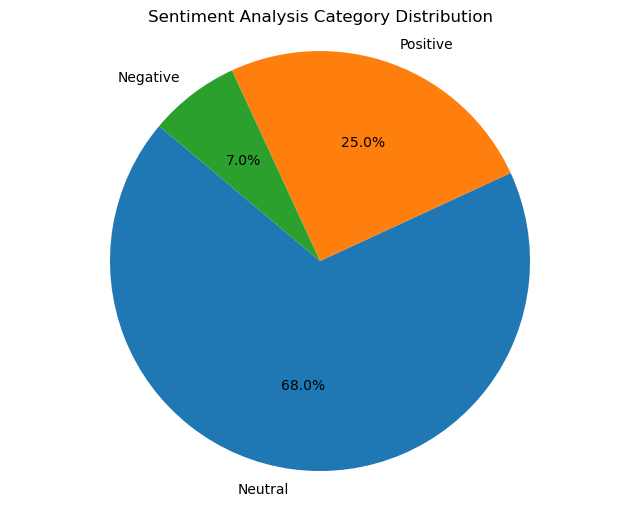

In [10]:
import matplotlib.pyplot as plt

# Calculate the counts of each sentiment category
sentiment_counts = df['sentiment_category'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Analysis Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

# Assuming the correct column name is 'stopwords_removed_text'
text_data_column = 'stopwords_removed_title' 

# Ensure the column is of string type
df[text_data_column] = df[text_data_column].astype(str)

# 1. Create a TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

# 2. Fit and transform the text data
tfidf = vectorizer.fit_transform(df[text_data_column])

# 3. Create and fit the NMF model, increasing the max_iter parameter
num_topics = 5
# Increase max_iter from the default of 200 to 1000
nmf_model = NMF(n_components=num_topics, random_state=42, max_iter=1000)
nmf_model.fit(tfidf)

# 4. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-num_top_words - 1:-1]]))
    print("\n")

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

Topic #1:
bitcoin ethereum btcusd demand says analysts solana warns 112k etf
Topic #2:
crypto malware steam market big surge rwa tip best reserve
Topic #3:
btc treasury bitcoins million years eth bitcoin ceo whale stock
Topic #4:
price 2025 prediction xrp coin best suggests september etfs presale
Topic #5:
update forecast btcusd ethereum september suggests 2025 billion altcoins weigh




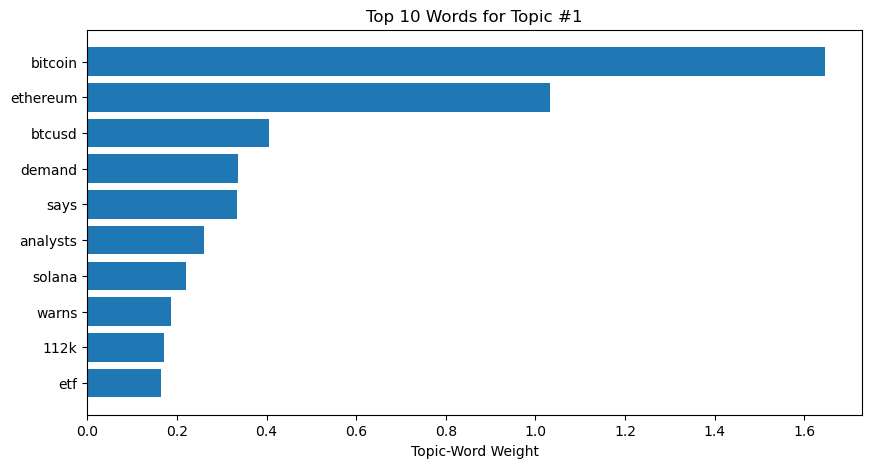

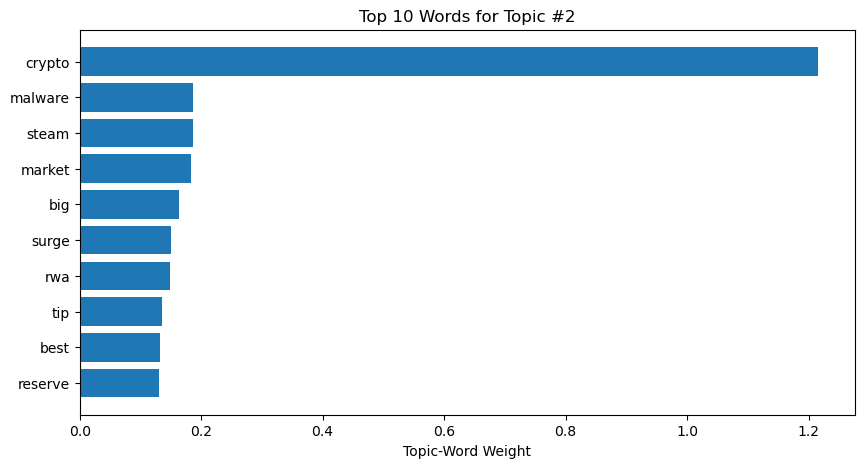

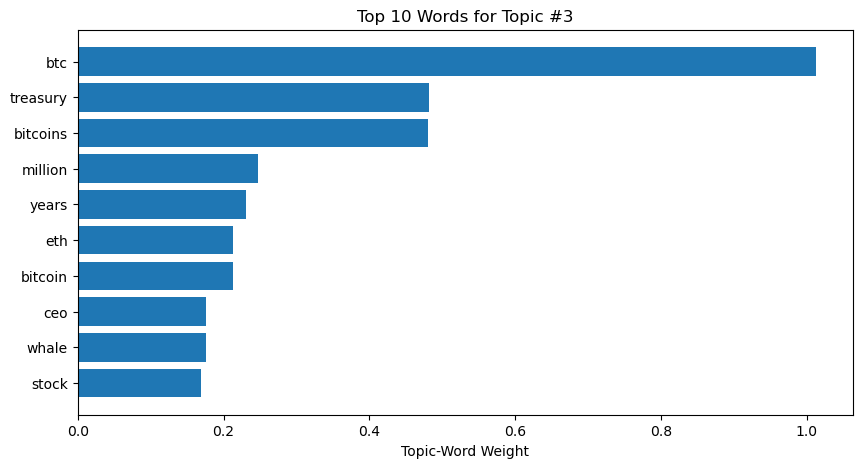

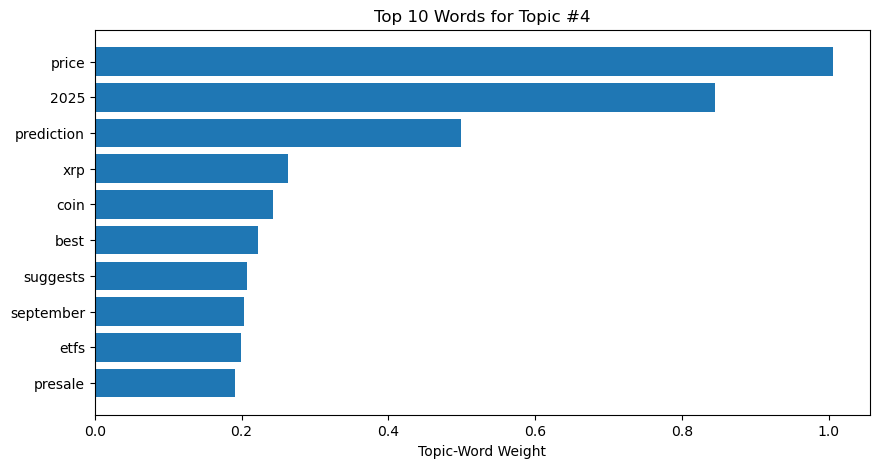

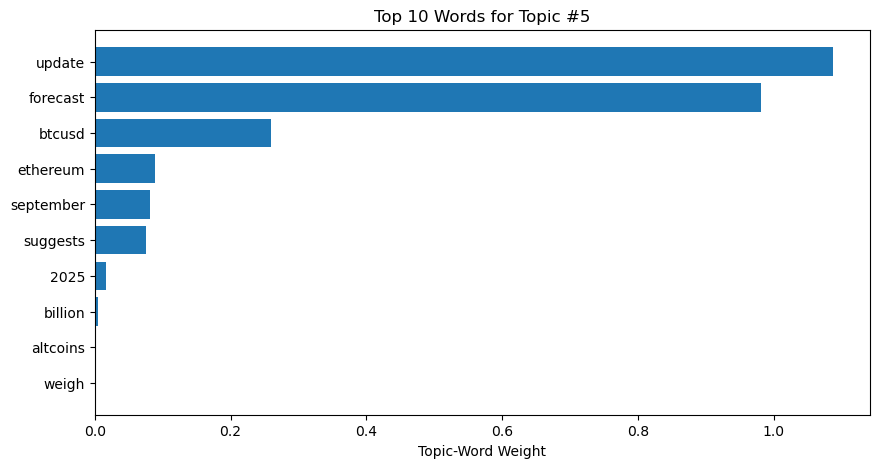

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Number of top words to display in each chart
num_top_words = 10

# Loop through each topic and create a bar chart
for topic_idx, topic in enumerate(nmf_model.components_):
    # Get the indices of the top words for this topic
    top_word_indices = topic.argsort()[:-num_top_words - 1:-1]
    
    # Get the top words and their corresponding weights
    top_words = [feature_names[i] for i in top_word_indices]
    top_weights = topic[top_word_indices]
    
    # Create the bar chart
    plt.figure(figsize=(10, 5))
    plt.barh(np.arange(num_top_words), top_weights, align='center')
    plt.yticks(np.arange(num_top_words), top_words)
    plt.gca().invert_yaxis()  # Invert y-axis to have the most important word on top
    plt.xlabel("Topic-Word Weight")
    plt.title(f"Top {num_top_words} Words for Topic #{topic_idx + 1}")
    plt.show

In [23]:
#!pip install wordcloud only once

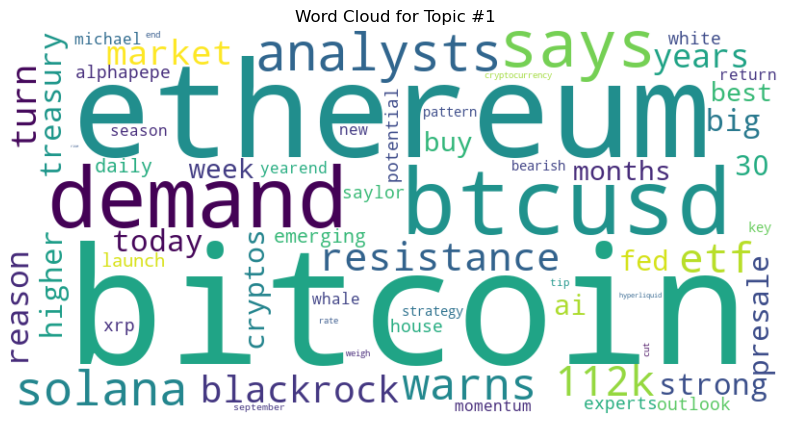

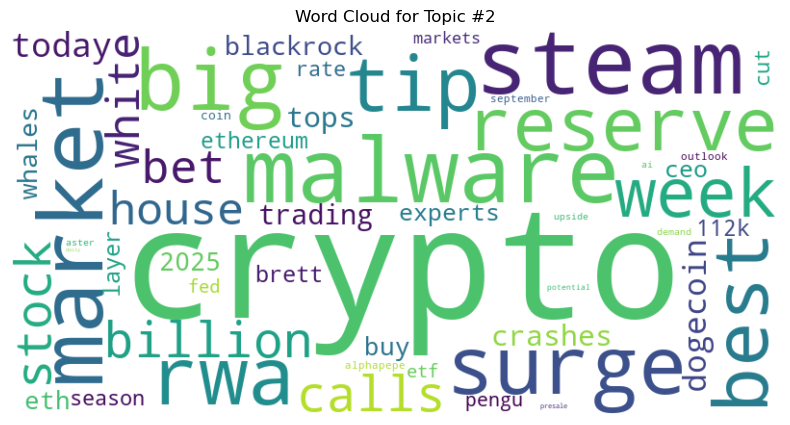

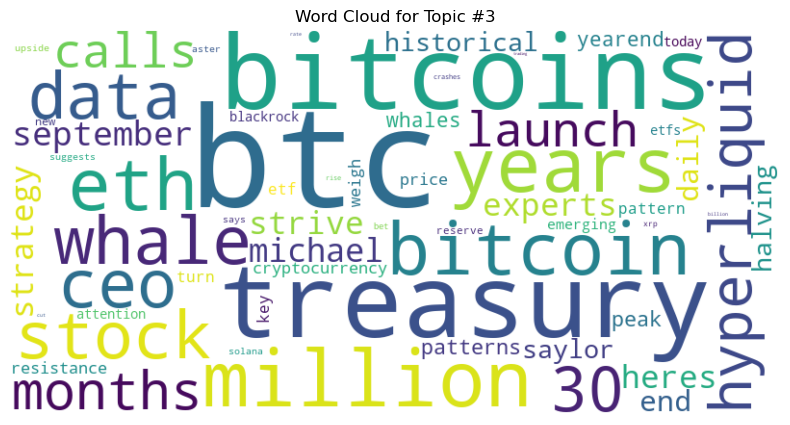

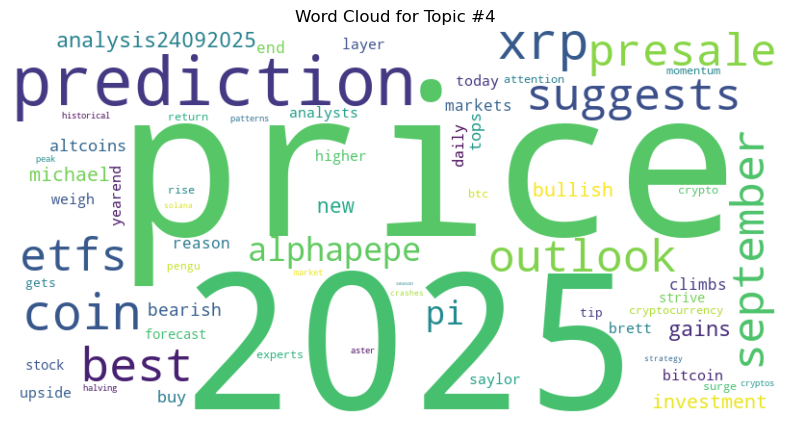

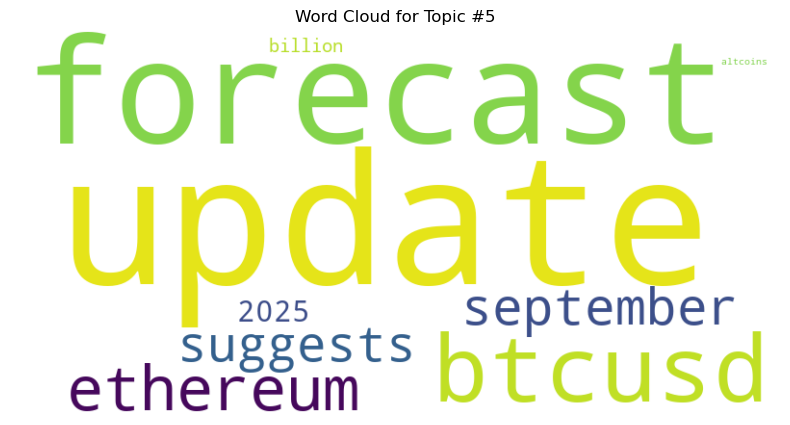

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and generate a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    # The weights are used as frequencies for the word cloud
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}
    
    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)
    
    # Plot the WordCloud image
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for Topic #{topic_idx + 1}")
    plt.show